In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import Image 
from glob import glob
import pickle

In [2]:
female = glob('./data/crop/female_crop/*.jpg')
male = glob('./data/crop/male_crop/*.jpg')

In [3]:
path = female + male

In [4]:
# getting size of image
def getSize(path):
    img = Image.open(path)
    return img.size[0]

In [5]:
getSize(path[0])

81

In [6]:
# Create a dataframe
df = pd.DataFrame(data=path, columns=['path'])
df.head()

,path
0,./data/crop/female_crop\female_0.jpg
1,./data/crop/female_crop\female_1.jpg
2,./data/crop/female_crop\female_10.jpg
3,./data/crop/female_crop\female_100.jpg
4,./data/crop/female_crop\female_101.jpg


In [7]:
df['size'] = df['path'].apply(getSize)
df.head()

,path,size
0,./data/crop/female_crop\female_0.jpg,81
1,./data/crop/female_crop\female_1.jpg,81
2,./data/crop/female_crop\female_10.jpg,182
3,./data/crop/female_crop\female_100.jpg,273
4,./data/crop/female_crop\female_101.jpg,182


In [8]:
df.tail()

,path,size
1387,./data/crop/male_crop\male_995.jpg,273
1388,./data/crop/male_crop\male_996.jpg,81
1389,./data/crop/male_crop\male_997.jpg,122
1390,./data/crop/male_crop\male_998.jpg,54
1391,./data/crop/male_crop\male_999.jpg,182


## EDA

In [9]:
df.describe()

,size
count,1392.000000
mean,160.231322
std,72.132085
min,36.000000
25%,81.000000
50%,182.000000
75%,182.000000
max,410.000000


<AxesSubplot:>

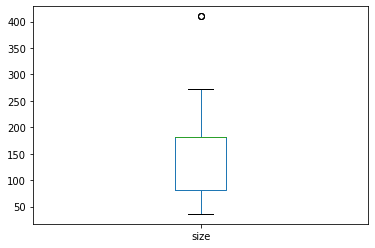

In [10]:
df['size'].plot(kind='box')

Text(0, 0.5, 'Number of the images')

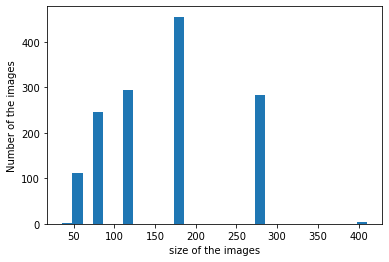

In [11]:
plt.hist(df['size'],bins=30)
plt.xlabel("size of the images")
plt.ylabel("Number of the images")

### So, from analysis I will resize all the images in 100 x 100 form and remove image with size less or equal 54

In [12]:
# Images with greater than the size 60
df_new = df[df['size'] > 60]
df_new

,path,size
0,./data/crop/female_crop\female_0.jpg,81
1,./data/crop/female_crop\female_1.jpg,81
2,./data/crop/female_crop\female_10.jpg,182
3,./data/crop/female_crop\female_100.jpg,273
4,./data/crop/female_crop\female_101.jpg,182
...,...,...
1386,./data/crop/male_crop\male_992.jpg,122
1387,./data/crop/male_crop\male_995.jpg,273
1388,./data/crop/male_crop\male_996.jpg,81
1389,./data/crop/male_crop\male_997.jpg,122


In [13]:
string = df_new['path'][0]
def gender(string):
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None

In [14]:
df['gender'] = df['path'].apply(gender)

female    0.627874
male      0.372126
Name: gender, dtype: float64


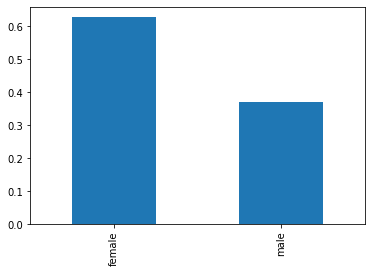

In [15]:
print(df['gender'].value_counts(normalize=True))
df['gender'].value_counts(normalize=True).plot(kind='bar')
plt.show()

1. 60% Female are there and rest 40% are male
2. All the images size is greater than or equal to 81

conclusion: resizing all the images in df_new to 100 x 100 array

In [16]:
df_new['size'].min()

81

## Resize image

In [17]:
def resize_img(path_to_resize):
    try: 
        # step-1: read image
        img = cv2.imread(path_to_resize)
        # step-2: convert into grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # step-3 resize into 100 x 100 array
        size = gray.shape[0]
        if size >= 100: #shrink
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_AREA) # SHRINK
        else:  #enlarge
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_CUBIC) # ENALRGE
        # step-4 Flattern Image (1x10,000)
        return  gray_re.flatten()
    except:
        return None

In [18]:
len(resize_img(path[0]))

10000

In [19]:
df_new['gender'] = df_new['path'].apply(gender)
df_new.head()

<ipython-input-19-38f68fd0a050>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gender'] = df_new['path'].apply(gender)


,path,size,gender
0,./data/crop/female_crop\female_0.jpg,81,female
1,./data/crop/female_crop\female_1.jpg,81,female
2,./data/crop/female_crop\female_10.jpg,182,female
3,./data/crop/female_crop\female_100.jpg,273,female
4,./data/crop/female_crop\female_101.jpg,182,female


In [20]:
# Structuring function
df_new['structure_data'] = df_new['path'].apply(resize_img)

<ipython-input-20-8c6df7a54181>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['structure_data'] = df_new['path'].apply(resize_img)


In [21]:
# copy and expand their columns
df1 = df_new['structure_data'].apply(pd.Series)
df1

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,20,19,18,18,18,17,15,17,20,25,...,104,103,98,81,43,28,33,31,25,24
1,20,19,18,18,18,17,15,17,20,25,...,104,103,98,81,43,28,33,31,25,24
2,14,12,12,13,7,13,18,20,19,11,...,17,7,25,22,22,21,16,20,16,17
3,211,207,198,198,75,73,121,103,99,101,...,135,191,181,141,150,180,158,181,166,241
4,1,0,0,0,0,0,0,0,1,0,...,18,10,46,34,11,5,9,16,60,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,40,46,54,52,60,48,56,62,61,45,...,52,51,52,49,58,57,60,62,69,76
1387,116,108,112,111,118,110,116,118,138,138,...,19,17,31,17,6,5,9,12,14,32
1388,144,135,112,93,82,60,61,50,39,35,...,29,28,27,27,27,28,28,29,32,38
1389,48,42,42,34,23,30,21,18,39,33,...,182,225,196,175,179,105,18,53,153,163


In [22]:
df2 = pd.concat((df_new['gender'],df1),axis=1)

In [23]:
df2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,20,19,18,18,18,17,15,17,20,...,104,103,98,81,43,28,33,31,25,24
1,female,20,19,18,18,18,17,15,17,20,...,104,103,98,81,43,28,33,31,25,24
2,female,14,12,12,13,7,13,18,20,19,...,17,7,25,22,22,21,16,20,16,17
3,female,211,207,198,198,75,73,121,103,99,...,135,191,181,141,150,180,158,181,166,241
4,female,1,0,0,0,0,0,0,0,1,...,18,10,46,34,11,5,9,16,60,81


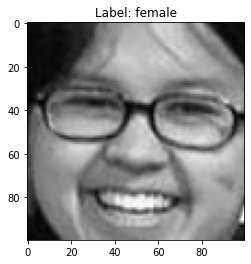

In [24]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title('Label: '+df2.loc[0]['gender'])
plt.show()

In [25]:
# save dataframe label in pickle format
import pickle

In [26]:
pickle.dump(df2, open('./data/dataframe_images_100_100.pickle','wb'))